In [47]:
import numpy as np
import pandas as pd
import math
import copy
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
filepath="/Data.csv"

In [49]:
def data_extract(filename):
  data=pd.read_csv(filepath)
  data=data.sort_values('age')
  X = np.array(data["age"])
  Y = np.array(data["num"])

  return X,Y

In [50]:
X,Y=data_extract(filepath)
print(X)
print(Y)

[29. 34. 34. 35. 35. 35. 35. 35. 37. 37. 38. 38. 39. 39. 39. 39. 39. 40.
 40. 40. 40. 41. 41. 41. 41. 41. 41. 41. 41. 41. 41. 42. 42. 42. 42. 42.
 42. 42. 42. 42. 42. 42. 43. 43. 43. 43. 43. 43. 43. 43. 43. 44. 44. 44.
 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 45. 45. 45. 45. 45. 45. 45. 45.
 46. 46. 46. 46. 46. 46. 46. 46. 47. 47. 47. 47. 47. 47. 48. 48. 48. 48.
 48. 48. 48. 49. 49. 49. 49. 49. 50. 50. 50. 50. 50. 50. 50. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 52. 52. 52. 52. 52. 52. 52. 52.
 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 54. 54. 54. 54.
 54. 54. 54. 54. 54. 54. 54. 54. 54. 54. 54. 54. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 57. 57. 57.
 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 58.
 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58.
 58. 58. 58. 58. 58. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59.
 59. 59. 59. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60

In [51]:
def Training_Testing_data_extract(X,Y):
  n = X.shape[0]
  m=int(n*0.75)

  X_train=X[:m]
  Y_train=Y[:m]

  X_test=X[m:]

  Y_test=Y[m:]
  return X_train,Y_train,X_test,Y_test

In [61]:
X_train,Y_train,X_test,Y_test=Training_Testing_data_extract(X,Y)
# X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train)
print(X_test)

[29. 34. 34. 35. 35. 35. 35. 35. 37. 37. 38. 38. 39. 39. 39. 39. 39. 40.
 40. 40. 40. 41. 41. 41. 41. 41. 41. 41. 41. 41. 41. 42. 42. 42. 42. 42.
 42. 42. 42. 42. 42. 42. 43. 43. 43. 43. 43. 43. 43. 43. 43. 44. 44. 44.
 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 45. 45. 45. 45. 45. 45. 45. 45.
 46. 46. 46. 46. 46. 46. 46. 46. 47. 47. 47. 47. 47. 47. 48. 48. 48. 48.
 48. 48. 48. 49. 49. 49. 49. 49. 50. 50. 50. 50. 50. 50. 50. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 52. 52. 52. 52. 52. 52. 52. 52.
 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53. 54. 54. 54. 54.
 54. 54. 54. 54. 54. 54. 54. 54. 54. 54. 54. 54. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 57. 57. 57.
 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 57. 58.
 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58. 58.
 58. 58. 58. 58. 58. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59. 59.
 59. 59. 59. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60

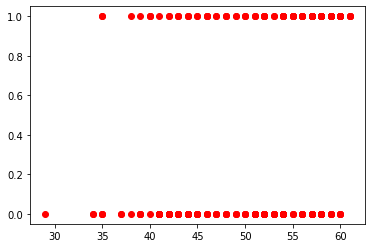

In [72]:
plt.plot(X_train,Y_train,'ro')


In [62]:
def count_target_yes_no(Y_train):
  target_yes=0
  target_no=0
  for i in range(len(Y_train)):
    if Y_train[i]==0:
      target_no=target_no+1
    else:
      target_yes=target_yes+1
  
  return target_no,target_yes

In [63]:
target_no,target_yes=count_target_yes_no(Y_train)
print(target_no)
print(target_yes)

142
112


In [64]:
def calculate_gini_impurity(cnt_one,cnt_zero,temp_one,temp_zero):
    x1=cnt_one+cnt_zero #
    x2=temp_one+temp_zero
    y1=1 - (cnt_one / x1) ** 2 - (cnt_zero / x1) ** 2
    y2=1 - (temp_one / x2) ** 2 - (temp_zero / x2) ** 2
    I = x1 / (x1 + x2) * y1 + x2 / (x1 + x2) * y2
    return I

In [65]:
def finding_the_node(X_train,Y_train,cnt_zero,cnt_one,target_no,target_yes):
  minn=float('inf')
  root_age=0
  for i in range(len(X_train)-1):

    if Y_train[i]==0:
      cnt_zero=cnt_zero+1
    else:
      cnt_one=cnt_one+1

    if X_train[i]==X_train[i+1]:
      continue
    temp_zero=target_no-cnt_zero
    temp_one=target_yes-cnt_one
    I=calculate_gini_impurity(cnt_one,cnt_zero,temp_one,temp_zero)

    if I<minn:
      minn=I
      root_age=(X_train[i]+X_train[i+1])/2
  
  return root_age,minn

In [66]:
age,Gini_impurity=finding_the_node(X_train,Y_train,0,0,target_no,target_yes)

**Age**

In [67]:
print("Age", age)

Age 54.5


In [70]:
print("Gini Impurity " ,Gini_impurity)

Gini Impurity  0.4364948886883645


**Accuracy**

In [68]:
def find_accuracy(X_test,Y_test):
  tot=0
  for i in range(len(X_test)):
    target=0
    if X_test[i]>age:
      target=1
      
    if target==Y_test[i]:
      tot=tot+1
  acc=tot/len(X_test)
  return acc

In [71]:
acc=find_accuracy(X_test,Y_test)
print(acc*100)

50.588235294117645
